## 2. Customer Segmentation
- Group customers into distinct segments based on their purchase scores and income.


In [34]:
import pandas as pd
import numpy as np

In [35]:
dataset = pd.read_csv('datasets/customers.csv')
X =  dataset.loc[:, ['Income', 'NumOfPurchases']]

In [36]:
np.any(np.isnan(X))

np.False_

In [37]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

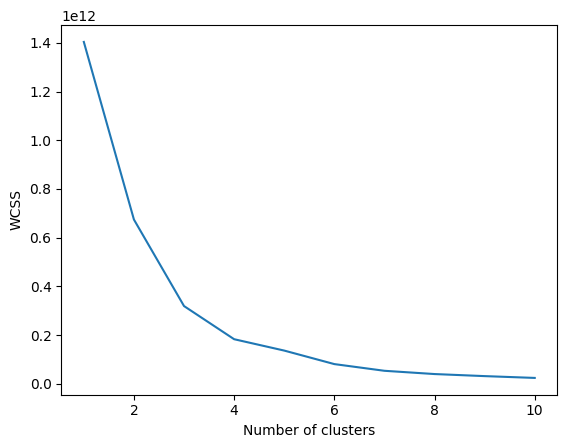

In [38]:
import matplotlib.pyplot as plt


plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(X)

Creating the dataset to be used in the plotly graph

In [40]:
X['Category'] = y_kmeans
X.head()

,Income,NumOfPurchases,Category
0,58138.0,25,1
1,46344.0,6,0
2,71613.0,21,1
3,26646.0,8,0
4,58293.0,19,1


In [41]:
import plotly.express as px

X['Category'] = X['Category'].astype(str)  # change category column to string values for colour_mapping

colour_mapping = {
    '0': '#1f77b4',
    '1': '#ff7f0e',
}

fig = px.scatter(
  X, x='Income', y='NumOfPurchases',
  color='Category',
  template='ggplot2',
  title='Cluster of Customers',
  color_discrete_map=colour_mapping
)

fig.update_layout(
  yaxis_title='Number of Purchases', 
  xaxis=dict(range=[0, 200000]),  # zoom in
)

fig.show()